In [1]:
import numpy as np
import pandas as pd

from textwrap import wrap

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import ast

import warnings
warnings.filterwarnings('ignore')

__Import Dataset__

In [2]:
mov = pd.read_csv('may_12.csv')
mov

,id,release_date,runtime,title,vote_average,vote_count,Year,Month,Revenue in 2023,Budget in 2023,...,companies_clean_list,countries_clean_list,keywords_clean_list,cast_clean_list,crew_clean_list,cast_short_list,crew_short_list,cast_short_freq,crew_short_freq,companies_freq
0,10003,1997-04-03,116.0,The Saint,5.9,310,1997,4,2.687934e+08,1.278807e+08,...,"['Paramount Pictures', 'Mace Neufeld Productio...",['United States of America'],"['berlin', 'russia', 'gas', 'master thief', 't...","['Val Kilmer', 'Elisabeth Shue', 'Rade Serbedz...","['Phillip Noyce', 'Jonathan Hensleigh', 'Wesle...","['Val Kilmer', 'Elisabeth Shue', 'Rade Serbedz...","['Phillip Noyce', 'Jonathan Hensleigh', 'Wesle...",0.000739,0.000219,0.008518
1,10155,1997-10-03,125.0,U Turn,6.5,185,1997,10,1.521306e+07,3.573136e+07,...,"['Illusion Entertainment Group', 'Phoenix Pict...","['France', 'United States of America']","['car breakdown', 'wilderness', 'kiss', 'gambl...","['Sean Penn', 'Nick Nolte', 'Jennifer Lopez', ...","['Robert Richardson', 'Victor Kempster', 'Oliv...","['Sean Penn', 'Nick Nolte', 'Jennifer Lopez']","['Robert Richardson', 'Victor Kempster', 'Oliv...",0.001614,0.000958,0.000679
2,10336,1997-07-31,96.0,Spawn,5.0,344,1997,7,1.999844e+08,7.522393e+07,...,"['New Line Cinema', 'Pull Down Your Pants Pict...",['United States of America'],"['anti hero', 'secret agent', 'fistfight', 'ba...","['Michael Jai White', 'Martin Sheen', 'John Le...","['Todd McFarlane', 'Alan B. McElroy', 'Clint G...","['Michael Jai White', 'Martin Sheen', 'John Le...","['Todd McFarlane', 'Alan B. McElroy', 'Clint G...",0.000465,0.000164,0.004415
3,10351,1997-09-19,90.0,Wishmaster,5.6,114,1997,9,3.578751e+07,9.402991e+06,...,"['Live Entertainment', 'Image Organization', '...",['United States of America'],"['fire', 'menace', 'wish', 'djinn', 'violence']","['Andrew Divoff', 'Tammy Lauren', 'Robert Engl...","['Pierre David', 'Robert Kurtzman', 'Peter Atk...","['Andrew Divoff', 'Tammy Lauren', 'Robert Engl...","['Pierre David', 'Robert Kurtzman', 'Peter Atk...",0.000274,0.000164,0.000170
4,10371,1997-12-11,115.0,For Richer or Poorer,5.6,43,1997,12,7.196891e+07,6.582093e+07,...,"['Universal Pictures', 'Yorktown Productions',...",['United States of America'],"['new york', 'pennsylvania', 'cheating', 'tax ...","['Tim Allen', 'Kirstie Alley', 'Wayne Knight',...","['Bryan Spicer', 'Jana Howington', 'Buzz Feits...","['Tim Allen', 'Kirstie Alley', 'Wayne Knight']","['Bryan Spicer', 'Jana Howington', 'Buzz Feits...",0.000301,0.000082,0.009339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4018,59964,1943-04-09,98.0,Cabin in the Sky,7.1,8,1943,4,5.789386e+07,1.155249e+07,...,['Metro-Goldwyn-Mayer (MGM)'],['United States of America'],"['angel', 'hell', 'prayer', 'shooting', 'singe...","['Ethel Waters', ""Eddie 'Rochester' Anderson"",...","['Arthur Freed', 'Vincente Minnelli', 'Busby B...","['Ethel Waters', ""Eddie 'Rochester' Anderson"",...","['Arthur Freed', 'Vincente Minnelli', 'Busby B...",0.000082,0.000301,0.004217
4019,60216,1943-05-03,96.0,Five Graves to Cairo,6.9,22,1943,5,4.324138e+07,1.491733e+07,...,['Paramount Pictures'],['United States of America'],"['hotel', 'egypt', 'world war ii', 'german', '...","['Franchot Tone', 'Anne Baxter', 'Akim Tamirof...","['Herbert Coleman', 'Billy Wilder', 'Billy Wil...","['Franchot Tone', 'Anne Baxter', 'Akim Tamiroff']","['Herbert Coleman', 'Billy Wilder', 'Billy Wil...",0.000137,0.000575,0.008037
4020,70368,1915-12-13,59.0,The Cheat,4.8,11,1915,12,2.050663e+07,5.173350e+05,...,['Jesse L. Lasky Feature Play Company'],['United States of America'],[],"['Fannie Ward', 'Jack Dean', 'Sessue Hayakawa'...","['Cecil B. DeMille', 'Cecil B. DeMille', 'Ceci...","['Fannie Ward', 'Jack Dean', 'Sessue Hayakawa']","['Cecil B. DeMille', 'Cecil B. DeMille', 'Ceci...",0.000082,0.000082,0.000028
4021,65203,1929-02-08,100.0,The Broadway Melody,5.0,20,1929,2,1.301174e+08,6.689815e+06,...,['Metro-Goldwyn-Mayer (MGM)'],['United State

In [3]:
mov.dtypes

id                        int64
release_date             object
runtime                 float64
title                    object
vote_average            float64
vote_count                int64
Year                      int64
Month                     int64
Revenue in 2023         float64
Budget in 2023          float64
overview                 object
collect_clean            object
genres_clean_list        object
companies_clean_list     object
countries_clean_list     object
keywords_clean_list      object
cast_clean_list          object
crew_clean_list          object
cast_short_list          object
crew_short_list          object
cast_short_freq         float64
crew_short_freq         float64
companies_freq          float64
dtype: object

In [4]:
mov.shape

(4023, 23)

__Distribution of Numerical Data__

In [5]:
stats = mov[["runtime", "vote_count", "vote_average", "Revenue in 2023", "Budget in 2023", "Year", "Month"]]
stats = stats[(stats["Revenue in 2023"] >= 1000) & (stats["Budget in 2023"] >= 1000)]
stats.describe().applymap(lambda x: f"{x:0.2f}")

,runtime,vote_count,vote_average,Revenue in 2023,Budget in 2023,Year,Month
count,4023.00,4023.00,4023.00,4023.00,4023.00,4023.00,4023.00
mean,107.04,586.34,6.17,114283574.42,48737669.86,1999.24,6.93
std,18.57,844.96,0.90,122974707.25,47429838.43,15.85,3.40
min,0.00,0.00,0.00,2557.08,3639.35,1915.00,1.00
25%,95.00,91.00,5.60,20288020.13,15091579.92,1993.00,4.00
50%,104.00,282.00,6.20,67744411.02,34000983.10,2004.00,7.00
75%,116.00,717.00,6.80,167165492.28,67054536.21,2010.00,10.00
max,225.00,9678.00,8.70,527594090.00,341809280.73,2017.00,12.00


__Distribution of Movies by Year__

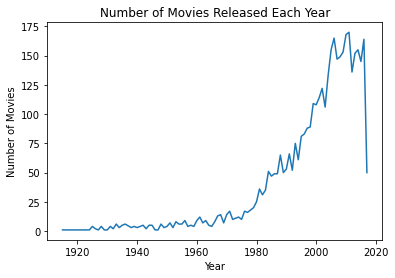

In [36]:
year_data = pd.DataFrame()
year_data["Year"] = mov.groupby("Year", dropna = False).count().index
year_data["Count"] = np.asarray(mov.groupby("Year", dropna = False).count()[["id"]])

plt.plot(year_data["Year"], year_data["Count"])
plt.title("Number of Movies Released Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

__Distribution of Movies by Month__

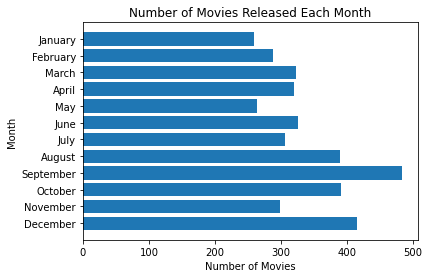

In [60]:
month_data = pd.DataFrame()
month_data["Month"] = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
month_data["Count"] = np.asarray(mov.groupby("Month", dropna = False).count()[["id"]])

plt.barh(month_data["Month"], month_data["Count"])
plt.title("Number of Movies Released Each Month")
plt.ylabel("Month")
plt.xlabel("Number of Movies")
plt.gca().invert_yaxis()
plt.show()

__Plots with Genre__

In [18]:
mov["Good or Bad Rating"] = rating_level

cols = ['genres_clean_list', 'companies_clean_list', 'countries_clean_list', 'keywords_clean_list', 'cast_clean_list', 'crew_clean_list', 'cast_short_list', 'crew_short_list']
for i in range(len(mov)):
    for c in cols:
        mov[c].iloc[i] = ast.literal_eval(mov[c].iloc[i])

In [69]:
# get list of unique genres
def get_unique(df, col):
    unique_cat = []
    for i in range(len(df)):
        for name in df[col].iloc[i]:
            if (name not in unique_cat):
                unique_cat.append(name)
    return unique_cat

# get count of total number of movies, number of good and bad movies, average revenue with certain names
def get_counts(df, col, unique_cat):
    # create dictionaries
    count_total = {}
    count_good = {}
    count_bad = {}
    avg_revenue = {}
    for x in unique_cat:
        count_total[x] = 0
        count_good[x] = 0
        count_bad[x] = 0
        avg_revenue[x] = 0
    # fill in count dictionaries 
    for i in range(len(df)):
        name_list = df[col].iloc[i]
        for name in unique_cat:
            if (name in name_list):
                count_total[name] += 1
                avg_revenue[name] += df["Revenue in 2023"].iloc[i]
                if (df["Good or Bad Rating"].iloc[i] == 1):
                    count_good[name] += 1
                else:
                    count_bad[name] += 1
    return list(count_total.values()), list(count_good.values()), list(count_bad.values()), list(avg_revenue.values())

# create dataframe containing calculated values
def make_df(col, unique_cat, total_count, count_good, count_bad, avg_revenue):
    df = pd.DataFrame()
    df[col] = unique_cat
    df["Total Count"] = total_count
    df["Good Ratings Count"] = count_good
    df["Bad Ratings Count"] = count_bad
    df["Proportion of Good Movies"] = df["Good Ratings Count"] * 1.0 / df["Total Count"]
    df["Proportion of Bad Movies"] = df["Bad Ratings Count"] * 1.0 / df["Total Count"]
    df["Average Revenue"] = avg_revenue / df["Total Count"]
    return df

In [70]:
unique_genres = get_unique(mov, "genres_clean_list")
total_count, count_good, count_bad, avg_revenue = get_counts(mov, "genres_clean_list", unique_genres)
genres = make_df("genres_clean_list", unique_genres, total_count, count_good, count_bad, avg_revenue)
genres

,genres_clean_list,Total Count,Good Ratings Count,Bad Ratings Count,Proportion of Good Movies,Proportion of Bad Movies,Average Revenue
0,Thriller,1198,198,1000,0.165275,0.834725,1.154334e+08
1,Action,1007,114,893,0.113208,0.886792,1.434509e+08
2,Romance,742,129,613,0.173854,0.826146,1.089413e+08
3,Science Fiction,472,51,421,0.108051,0.891949,1.337344e+08
4,Adventure,616,97,519,0.157468,0.842532,1.697887e+08
5,Fantasy,334,38,296,0.113772,0.886228,1.466138e+08
6,Horror,517,43,474,0.083172,0.916828,9.167081e+07
7,Comedy,1447,174,1273,0.120249,0.879751,1.115661e+08
8,Crime,697,162,535,0.232425,0.767575,1.115361e+08
9,Mystery,363,79,284,0.217631,0.782369,1.175468e+08


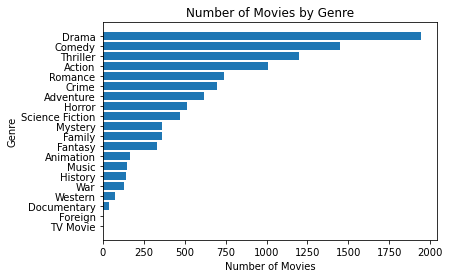

In [72]:
genre_count = genres.sort_values(by = "Total Count", ascending = True, ignore_index = True)

plt.barh(genre_count["genres_clean_list"], genre_count["Total Count"])
plt.title("Number of Movies by Genre")
plt.ylabel("Genre")
plt.xlabel("Number of Movies")
plt.show()

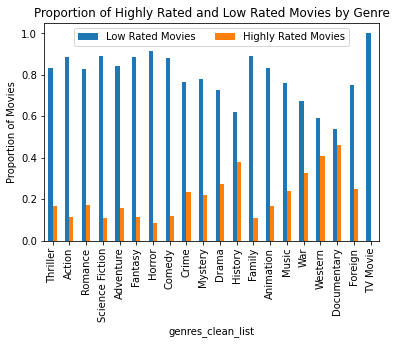

In [73]:
df = pd.DataFrame(np.c_[genres["Proportion of Bad Movies"], genres["Proportion of Good Movies"]], index = genres["genres_clean_list"])
df.plot.bar()
plt.title("Proportion of Highly Rated and Low Rated Movies by Genre")
plt.ylabel("Proportion of Movies")
plt.legend(labels = ["Low Rated Movies", "Highly Rated Movies"], loc='upper center', bbox_to_anchor = (0.5, 1.0), ncol = 2)
plt.show()

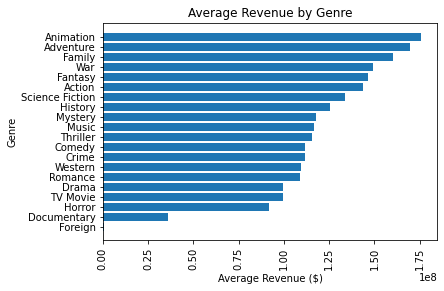

In [74]:
df = genres.sort_values("Average Revenue", ascending = True)
plt.barh(df["genres_clean_list"], df["Average Revenue"])
plt.title("Average Revenue by Genre")
plt.xticks(rotation = 90)
plt.ylabel("Genre")
plt.xlabel("Average Revenue ($)")
plt.show()

__Plots with Production Companies__

In [71]:
unique_comp = get_unique(mov, "companies_clean_list")
total_count, count_good, count_bad, avg_revenue = get_counts(mov, "companies_clean_list", unique_comp)
companies = make_df("companies_clean_list", unique_comp, total_count, count_good, count_bad, avg_revenue)
companies

,companies_clean_list,Total Count,Good Ratings Count,Bad Ratings Count,Proportion of Good Movies,Proportion of Bad Movies,Average Revenue
0,Paramount Pictures,284,59,225,0.207746,0.792254,1.637226e+08
1,Mace Neufeld Productions,10,4,6,0.400000,0.600000,2.649122e+08
2,Rysher Entertainment,7,0,7,0.000000,1.000000,9.168706e+07
3,Illusion Entertainment Group,2,0,2,0.000000,1.000000,2.319534e+07
4,Phoenix Pictures,16,4,12,0.250000,0.750000,1.155874e+08
...,...,...,...,...,...,...,...
4051,Douglas Fairbanks Pictures,1,1,0,1.000000,0.000000,5.074018e+07
4052,Universal Film Manufacturing Company,1,0,1,0.000000,1.000000,5.974414e+07
4053,Pickford Corporation,1,1,0,1.000000,0.000000,4.041550e+07
4054,Jesse L. Lasky Feature Play Company,1,0,1,0.000000,1.000000,2.050663e+07


In [134]:
comp_count = companies.nlargest(10, "Total Count")
comp_count = comp_count.rename(columns = {"companies_clean_list": "Production Company"})
comp_count.round(2)

,Production Company,Total Count,Good Ratings Count,Bad Ratings Count,Proportion of Good Movies,Proportion of Bad Movies,Average Revenue
26,Warner Bros.,338,99,239,0.29,0.71,1.597702e+08
13,Universal Pictures,325,58,267,0.18,0.82,1.645846e+08
0,Paramount Pictures,284,59,225,0.21,0.79,1.637226e+08
38,Twentieth Century Fox Film Corporation,239,43,196,0.18,0.82,1.792448e+08
88,Columbia Pictures,185,33,152,0.18,0.82,1.793084e+08
7,New Line Cinema,154,24,130,0.16,0.84,1.315164e+08
75,Metro-Goldwyn-Mayer (MGM),149,35,114,0.23,0.77,1.208669e+08
32,Touchstone Pictures,116,20,96,0.17,0.83,1.433836e+08
242,Relativity Media,108,12,96,0.11,0.89,1.506714e+08
76,Columbia Pictures Corporation,97,13,84,0.13,0.87,1.648859e+08


__Plots with Cast__

In [98]:
unique_cast = get_unique(mov, "cast_short_list")
total_count, count_good, count_bad, avg_revenue = get_counts(mov, "cast_short_list", unique_cast)
cast = make_df("cast_short_list", unique_cast, total_count, count_good, count_bad, avg_revenue)
cast

,cast_short_list,Total Count,Good Ratings Count,Bad Ratings Count,Proportion of Good Movies,Proportion of Bad Movies,Average Revenue
0,Val Kilmer,20,5,15,0.250000,0.750000,1.461424e+08
1,Elisabeth Shue,6,1,5,0.166667,0.833333,2.269812e+08
2,Rade Serbedzija,1,0,1,0.000000,1.000000,2.687934e+08
3,Sean Penn,23,9,14,0.391304,0.608696,9.669043e+07
4,Nick Nolte,18,3,15,0.166667,0.833333,1.384162e+08
...,...,...,...,...,...,...,...
4583,Charles King,1,0,1,0.000000,1.000000,1.301174e+08
4584,Anita Page,1,0,1,0.000000,1.000000,1.301174e+08
4585,Bessie Love,1,0,1,0.000000,1.000000,1.301174e+08
4586,Charles 'Buddy' Rogers,1,1,0,1.000000,0.000000,4.296024e+07


In [135]:
cast_count = cast.nlargest(10, "Total Count")
cast_count = cast_count.rename(columns = {"cast_short_list": "Actor"})
cast_count.round(2)

,Actor,Total Count,Good Ratings Count,Bad Ratings Count,Proportion of Good Movies,Proportion of Bad Movies,Average Revenue
140,Robert De Niro,45,16,29,0.36,0.64,1.516048e+08
53,Nicolas Cage,40,5,35,0.12,0.88,1.174395e+08
123,Bruce Willis,37,4,33,0.11,0.89,1.423936e+08
27,Morgan Freeman,33,7,26,0.21,0.79,1.581496e+08
277,Denzel Washington,33,12,21,0.36,0.64,2.065062e+08
30,Matt Damon,32,9,23,0.28,0.72,2.027552e+08
73,Sylvester Stallone,32,2,30,0.06,0.94,1.773985e+08
102,Julianne Moore,29,8,21,0.28,0.72,8.961529e+07
63,Samuel L. Jackson,28,5,23,0.18,0.82,1.799134e+08
156,Clint Eastwood,27,12,15,0.44,0.56,1.920024e+08


__Plots with Crew__

In [121]:
unique_crew = get_unique(mov, "crew_short_list")
total_count, count_good, count_bad, avg_revenue = get_counts(mov, "crew_short_list", unique_crew)
crew = make_df("crew_short_list", unique_crew, total_count, count_good, count_bad, avg_revenue)
crew

,crew_short_list,Total Count,Good Ratings Count,Bad Ratings Count,Proportion of Good Movies,Proportion of Bad Movies,Average Revenue
0,Phillip Noyce,3,0,3,0.000000,1.000000,1.943166e+08
1,Jonathan Hensleigh,2,0,2,0.000000,1.000000,1.804205e+08
2,Wesley Strick,3,0,3,0.000000,1.000000,9.852252e+07
3,Robert Richardson,14,8,6,0.571429,0.428571,1.992568e+08
4,Victor Kempster,4,1,3,0.250000,0.750000,1.825070e+08
...,...,...,...,...,...,...,...
5118,Cecil B. DeMille,1,0,1,0.000000,1.000000,2.050663e+07
5119,Harry Beaumont,1,0,1,0.000000,1.000000,1.301174e+08
5120,John Arnold,1,0,1,0.000000,1.000000,1.301174e+08
5121,Allen McNeil,1,1,0,1.000000,0.000000,4.296024e+07


In [136]:
crew_count = crew.nlargest(10, "Total Count")
crew_count = crew_count.rename(columns = {"crew_short_list": "Crew Member"})
crew_count.round(2)

,Crew Member,Total Count,Good Ratings Count,Bad Ratings Count,Proportion of Good Movies,Proportion of Bad Movies,Average Revenue
145,Avy Kaufman,57,7,50,0.12,0.88,9.402851e+07
246,Mary Vernieu,35,6,29,0.17,0.83,9.404120e+07
54,James Newton Howard,33,4,29,0.12,0.88,1.850573e+08
191,Deborah Aquila,31,2,29,0.06,0.94,1.093165e+08
164,Joel Silver,30,5,25,0.17,0.83,1.283933e+08
53,Arnon Milchan,29,4,25,0.14,0.86,1.607858e+08
318,Francine Maisler,29,7,22,0.24,0.76,1.255402e+08
811,Bob Weinstein,28,4,24,0.14,0.86,1.046048e+08
140,Clint Eastwood,27,12,15,0.44,0.56,1.846373e+08
339,Bruce Berman,27,2,25,0.07,0.93,1.534094e+08


__Correlation Heatmap__

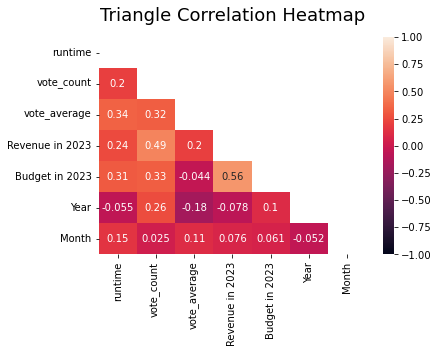

In [27]:
mask = np.triu(np.ones_like(stats.corr(), dtype=np.bool))
heatmap = sns.heatmap(stats.corr(), mask=mask, vmin=-1, vmax=1, annot=True) # cmap='BrBG'
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);